In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import os
from collections import defaultdict
import json
import matplotlib.pyplot as plt

## katakana

In [ ]:
from scipy.io.arff import loadarff

katakana_data_path =  '/content/gdrive/MyDrive/Colab Notebooks/Recognitaion_eye_written_char_with_siamese_net/eye_writing_data/eog_katakana/'

raw_data_dict = defaultdict()
for file_name in os.listdir(katakana_data_path):
  file_type = file_name.split('.')[-1]

  if file_type == 'arff':
    arff_data = loadarff(katakana_data_path + '/' + file_name)
    raw_data_dict[file_name] = pd.DataFrame(arff_data[0])

raw_data_dict = dict(raw_data_dict)

In [ ]:
print(raw_data_dict.keys())

dict_keys(['EOGVerticalSignal_TEST.arff', 'EOGVerticalSignal_TRAIN.arff', 'EOGHorizontalSignal_TEST.arff', 'EOGHorizontalSignal_TRAIN.arff'])


In [ ]:
raw_data_dict['EOGHorizontalSignal_TRAIN.arff']

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att1242,att1243,att1244,att1245,att1246,att1247,att1248,att1249,att1250,target
0,0.47769,0.60965,0.44162,0.57358,0.70555,0.83751,0.96947,1.10140,1.23340,0.96536,...,-112.760,-112.620,-112.490,-112.360,-112.230,-112.100,-110.760,-111.030,-110.900,b'1'
1,2.33700,2.35920,3.08140,3.10350,2.42570,2.44790,2.17000,2.49220,2.51440,2.53650,...,-188.060,-188.040,-188.010,-187.990,-187.970,-187.950,-187.930,-187.100,-186.980,b'1'
2,-10.24000,-10.21900,-10.19800,-10.37700,-10.85600,-10.93600,-10.81500,-10.39400,-10.37300,-10.35200,...,-234.040,-234.010,-234.090,-234.070,-234.250,-234.530,-234.510,-234.390,-234.570,b'1'
3,9.99690,9.87520,9.75350,9.63190,10.51000,11.68900,12.06700,11.94500,12.22400,12.80200,...,-296.100,-296.920,-297.040,-297.170,-297.890,-298.110,-297.530,-297.650,-297.170,b'1'
4,13.86800,13.07200,12.17500,11.67900,11.28200,10.88600,10.58900,10.09300,9.69610,9.29950,...,-364.830,-365.230,-365.630,-365.720,-365.420,-365.720,-365.910,-366.510,-367.710,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,-7.79810,-6.45730,-6.41650,-6.37570,-6.33490,-7.59420,-6.25340,-6.21260,-6.17180,-6.13100,...,12.512,10.852,10.893,10.934,10.975,13.915,11.056,11.097,11.138,b'12'
358,-0.45192,-0.39519,-0.33845,-0.28172,2.47500,2.53180,2.58850,2.64520,-0.89804,-0.44130,...,100.560,100.610,100.670,104.430,103.180,103.240,103.300,102.050,105.810,b'12'
359,3.37530,4.16190,4.24860,4.33520,4.42180,1.80840,1.89510,1.98170,2.06830,2.15490,...,81.276,81.362,79.949,81.636,81.722,81.809,81.895,80.382,80.469,b'12'
360,5.99230,5.99820,4.40410,4.41000,4.41590,4.42180,4.42770,0.63365,0.63957,0.64548,...,-16.870,-14.264,-16.458,-16.452,-16.446,-17.040,-14.435,-17.229,-17.223,b'12'


In [ ]:
raw_data_dict['EOGHorizontalSignal_TEST.arff']

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att1242,att1243,att1244,att1245,att1246,att1247,att1248,att1249,att1250,target
0,23.7700,24.4370,25.1040,25.7700,25.9370,25.2040,24.37000,24.4370,24.8040,25.4700,...,907.4200,907.6900,908.25000,908.82000,909.3900,910.0500,910.6200,910.8900,910.5500,b'1'
1,-7.5593,-7.1868,-7.4143,-7.0419,-7.5694,-7.1970,-7.42450,-7.4520,-7.2796,-6.9071,...,82.7630,82.0360,81.30800,80.78100,80.6530,80.7260,81.0980,81.2710,81.6430,b'1'
2,16.8790,14.2100,11.6410,10.7720,10.0030,8.9342,8.16530,8.3963,8.1274,7.3584,...,239.8100,240.2400,240.67000,241.11000,241.5400,241.9700,242.4000,242.8300,242.6600,b'1'
3,-6.6687,-7.2962,-7.9238,-8.5513,-7.8788,-7.2063,-7.63390,-8.0614,-8.3889,-7.7165,...,-1097.2000,-1097.9000,-1098.50000,-1099.10000,-1100.2000,-1100.9000,-1100.7000,-1101.3000,-1100.5000,b'1'
4,14.6500,14.8500,14.8500,15.0510,15.3510,15.1510,15.45100,15.6520,15.7520,15.6520,...,-76.4580,-77.1580,-78.15700,-77.85700,-77.5570,-77.2570,-75.9560,-75.6560,-75.3560,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2.8186,2.4425,2.5665,2.0904,1.6144,1.7383,0.86227,1.9862,2.1102,1.9341,...,50.8330,50.9570,51.08100,51.20500,51.4290,51.8530,51.9760,52.1000,52.2240,b'12'
358,4.9351,4.9536,5.1721,5.1906,5.2091,5.4276,5.24610,5.1646,5.0831,5.0016,...,12.7900,12.8080,13.02700,12.34500,12.3640,11.5820,11.5010,11.1190,11.1380,b'12'
359,8.6305,8.1153,8.8001,8.8849,8.3696,8.0544,8.13920,8.6240,8.3088,7.8936,...,58.6500,58.7350,58.82000,58.90500,58.9890,59.0740,59.1590,59.0440,58.9290,b'12'
360,18.1320,17.1540,16.0770,15.9990,15.6210,15.5440,15.46600,14.9880,13.8110,12.5330,...,125.7100,125.7400,125.66000,125.78000,126.1000,126.0200,126.1500,126.4700,126.3900,b'12'


In [ ]:
print(raw_data_dict['EOGHorizontalSignal_TRAIN.arff']['target'].value_counts())
print(raw_data_dict['EOGHorizontalSignal_TEST.arff']['target'].value_counts())

b'6'     31
b'7'     31
b'1'     30
b'2'     30
b'3'     30
b'4'     30
b'5'     30
b'8'     30
b'9'     30
b'10'    30
b'11'    30
b'12'    30
Name: target, dtype: int64
b'5'     31
b'9'     31
b'11'    31
b'1'     30
b'2'     30
b'3'     30
b'4'     30
b'6'     30
b'7'     30
b'8'     30
b'10'    30
b'12'    29
Name: target, dtype: int64


In [ ]:
row_len = raw_data_dict['EOGHorizontalSignal_TRAIN.arff'].shape[0]
att_len = raw_data_dict['EOGHorizontalSignal_TRAIN.arff'].shape[1]

dataset = defaultdict(list)

# train
for i in range(row_len):

  hori_data = raw_data_dict['EOGHorizontalSignal_TRAIN.arff'].loc[i][:-1].tolist()
  ver_data = raw_data_dict['EOGVerticalSignal_TRAIN.arff'].loc[i][:-1].tolist()

  fliped_hori_data = [-x for x in hori_data]   # x축 좌우 반전 (부호 변환)

  data = np.stack((fliped_hori_data, ver_data), axis=1).tolist()

  target = raw_data_dict['EOGHorizontalSignal_TRAIN.arff'].loc[i][-1].decode()

  dataset[target].append(data)

dataset.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

In [ ]:
row_len = raw_data_dict['EOGHorizontalSignal_TEST.arff'].shape[0]
att_len = raw_data_dict['EOGHorizontalSignal_TEST.arff'].shape[1]

# test
for i in range(row_len):

  hori_data = raw_data_dict['EOGHorizontalSignal_TEST.arff'].loc[i][:-1].tolist()
  ver_data = raw_data_dict['EOGVerticalSignal_TEST.arff'].loc[i][:-1].tolist()

  fliped_hori_data = [-x for x in hori_data]   # x축 좌우 반전 (부호 변환)

  data = np.stack((fliped_hori_data, ver_data), axis=1).tolist()

  target = raw_data_dict['EOGHorizontalSignal_TEST.arff'].loc[i][-1].decode()

  dataset[target].append(data)

dataset.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

In [ ]:
# 약간의 데이터 불균형이 있다.
# 데이터의 수가 60보다 작은 경우 마지막 항목을 복사해서 추가
# 데이터의 수가 60보다 많은 경우 마지막 항목을 삭제

for key in list(dataset.keys()):
  data = np.array(dataset[key])
  print(key, data.shape)

  if len(data)>60:
    dataset[key] = dataset[key][:-1]
  elif len(data)<60:
    dataset[key].append(dataset[key][-1])


1 (60, 1250, 2)
2 (60, 1250, 2)
3 (60, 1250, 2)
4 (60, 1250, 2)
5 (61, 1250, 2)
6 (61, 1250, 2)
7 (61, 1250, 2)
8 (60, 1250, 2)
9 (61, 1250, 2)
10 (60, 1250, 2)
11 (61, 1250, 2)
12 (59, 1250, 2)


In [ ]:
save_path = '/content/gdrive/MyDrive/Colab Notebooks/Recognitaion_eye_written_char_with_siamese_net/v2_dataset/'

with open(save_path + 'eog_katakana.json','w') as f:
    json.dump(dict(dataset),f)

## Arabic Numbers

In [ ]:
import re

eb_removed_csv_path = '/content/gdrive/MyDrive/Colab Notebooks/Recognitaion_eye_written_char_with_siamese_net/eye_writing_data/csv_eb_removed'
raw_csv_path = '/content/gdrive/MyDrive/Colab Notebooks/Recognitaion_eye_written_char_with_siamese_net/eye_writing_data/csv_raw_data'


def numbers_csv2json(files_path):
  dataset = defaultdict(list)

  for folder in os.listdir(files_path):
    folder_path = files_path +'/'+ folder

    for filename in os.listdir(folder_path):
      data_path = folder_path +'/'+filename

      data = pd.read_csv(data_path)
      data = np.array(data)[:-1].tolist()

      metadata = re.sub('.csv', '', filename)
      label = metadata.split('_')[-1]
      label = int(label.lstrip("0")) -1

      dataset[label].append(data)   

  dataset = sorted(dataset.items())

  return dict(dataset)


In [ ]:
eb_removed_numbers = numbers_csv2json(eb_removed_csv_path)
raw_numbers = numbers_csv2json(raw_csv_path)

In [ ]:
save_path = '/content/gdrive/MyDrive/Colab Notebooks/Recognitaion_eye_written_char_with_siamese_net/v2_dataset/'

with open(save_path + 'eog_eb_removed_numbers.json','w') as f:
    json.dump(eb_removed_numbers,f)

with open(save_path + 'eog_raw_numbers.json','w') as f:
    json.dump(raw_numbers,f)


## data visualization

In [ ]:
save_path = '/content/gdrive/MyDrive/Colab Notebooks/Recognitaion_eye_written_char_with_siamese_net/v2_dataset/'

with open(save_path + 'eog_raw_numbers.json') as f:
  eog_raw_numbers = json.load(f)

with open(save_path + 'eog_eb_removed_numbers.json') as f:
  eog_eb_removed_numbers = json.load(f)

with open(save_path + 'eog_katakana.json') as f:
  eog_katakana = json.load(f)


In [ ]:
print(eog_katakana.keys())
print(eog_raw_numbers.keys())
print(eog_eb_removed_numbers.keys())

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])


In [ ]:
# visualization

import matplotlib.pyplot as plt

def plot_images(data_dict):
  classes = list(data_dict.keys())
  n_cls = len(classes)
  n_data = len(data_dict[classes[0]])

  fig, axes = plt.subplots(n_data, n_cls, figsize=(5*n_cls, 5*n_data))

  for i, cls in enumerate(classes):

    if n_data == 1:
      x,y = zip(*data_dict[cls][0])

      axes[i].set_xlim([-0.2, 1.2])
      axes[i].set_ylim([-0.2, 1.2])
      axes[i].plot(x,y)
      axes[i].scatter(x,y)

    else:
      for j, idx in enumerate(range(n_data)):
        x,y = zip(*data_dict[cls][idx])

        axes[j][i].set_xlim([-0.2, 1.2])
        axes[j][i].set_ylim([-0.2, 1.2])
        axes[j][i].plot(x,y)
        axes[j][i].scatter(x,y)


In [ ]:
plot_images(eog_katakana)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_images(eog_raw_numbers)

Output hidden; open in https://colab.research.google.com to view.

## Reference data

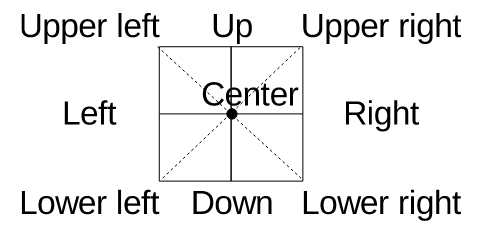

In [ ]:
# keypoints location

upper_left = [-0.8,0.8]
up = [0,0.8]
upper_right = [0.8,0.8]
left = [-0.8,0]
center = [0,0]
right = [0.8,0]
lower_left = [-0.8,-0.8]
down = [0,-0.8]
lower_right = [0.8,-0.8]


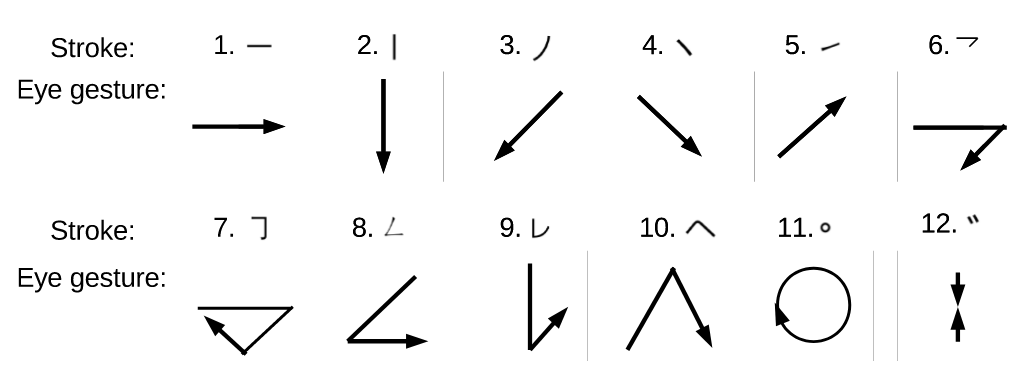

In [ ]:
# katakana keypoints 

kat_class_1 = [center, left, right]
kat_class_2 = [center, up, down]
kat_class_3 = [center, upper_right, lower_left]
kat_class_4 = [center, upper_left, lower_right]
kat_class_5 = [center, lower_left, upper_right]
kat_class_6 = [center, left, right, down]
kat_class_7 = [center, left, right, down, left]
kat_class_8 = [center, upper_right, lower_left, lower_right]
kat_class_9 = [center, up, down, right]
kat_class_10 = [center, lower_left, up, lower_right]
kat_class_11 = [center, left, [round(-0.8/2**(1/2),1), round(0.8/2**(1/2),1)],
                          up, [round(0.8/2**(1/2),1), round(0.8/2**(1/2),1)],
                        right, [round(0.8/2**(1/2),1), round(-0.8/2**(1/2),1)], 
                        down, [round(-0.8/2**(1/2),1), round(-0.8/2**(1/2),1)],
                        left]
kat_class_12 = [center, up, down, center]


raw_katakana_ref = defaultdict(list)
raw_katakana_ref = {'1':kat_class_1,
                    '2':kat_class_2,
                    '3':kat_class_3,
                    '4':kat_class_4,
                    '5':kat_class_5,
                    '6':kat_class_6,
                    '7':kat_class_7,
                    '8':kat_class_8,
                    '9':kat_class_9,
                    '10':kat_class_10,
                    '11':kat_class_11,
                    '12':kat_class_12}


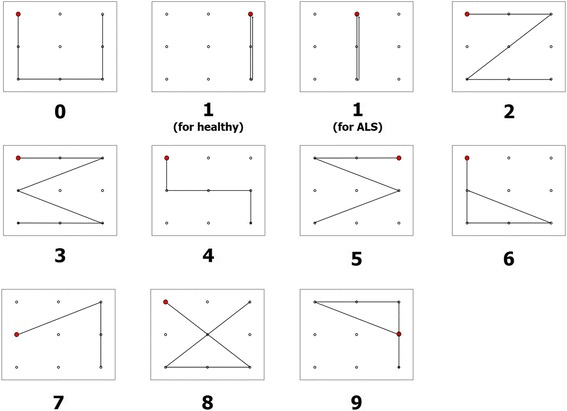

In [ ]:
# numbers keypoints

num_class_0 = [center, upper_left, lower_left, lower_right, upper_right]
num_class_1 = [center, upper_right, lower_right]
num_class_2 = [center, upper_left, upper_right, lower_left, lower_right]
num_class_3 = [center, upper_left, upper_right, left, lower_right, lower_left]
num_class_4 = [center, upper_left, left, right, lower_right]
num_class_5 = [center, upper_right, upper_left, right, lower_left]
num_class_6 = [center, upper_left, lower_left, lower_right, left]
num_class_7 = [center, left, upper_right, lower_right]
num_class_8 = [center, upper_left, lower_right, lower_left, upper_right]
num_class_9 = [center, right, upper_left, upper_right, lower_right]

raw_numbers_ref = defaultdict(list)
raw_numbers_ref = {'0':num_class_0,
                   '1':num_class_1,
                   '2':num_class_2,
                   '3':num_class_3,
                   '4':num_class_4,
                   '5':num_class_5,
                   '6':num_class_6,
                   '7':num_class_7,
                   '8':num_class_8,
                   '9':num_class_9}


In [ ]:
def fill_points(raw_dict, n_goal_point):
  classes = list(raw_dict.keys())
  
  dataset = defaultdict(list)

  for cls in classes:
    data = raw_dict[cls]
    n_line = len(data)-1
    n_distribute_points = int(n_goal_point / n_line)

    point_list = []
    for i in range(n_line):
      from_ = data[i]
      to_ = data[i+1]

      x_dist = from_[0] - to_[0]
      y_dist = from_[1] - to_[1]

      x_loc = x_dist / n_distribute_points
      y_loc = y_dist / n_distribute_points

      for p in range(n_distribute_points):
        new_point = [round(from_[0]-(x_loc*p), 4), round(from_[1]-(y_loc*p), 4)]
        point_list.append(new_point)
      
    dataset[cls] = [point_list]

  return dict(dataset)


In [ ]:
# goal point 의 수는 모든 정수에서 약분 가능한 720 을 부여한다. 

katakana_ref = fill_points(raw_katakana_ref, 720)
numbers_ref = fill_points(raw_numbers_ref, 720)

In [ ]:
# save

save_path = '/content/gdrive/MyDrive/Colab Notebooks/Recognitaion_eye_written_char_with_siamese_net/v2_dataset/'

reference_data = {'katakana': katakana_ref,
                  'numbers' : numbers_ref}

with open(save_path + 'reference_data.json','w') as f:
    json.dump(reference_data,f)


In [ ]:
# load

with open(save_path + 'reference_data.json') as f:
  reference_data = json.load(f)

In [ ]:
load_katakana_ref = reference_data['katakana']
load_numbers_ref = reference_data['numbers']

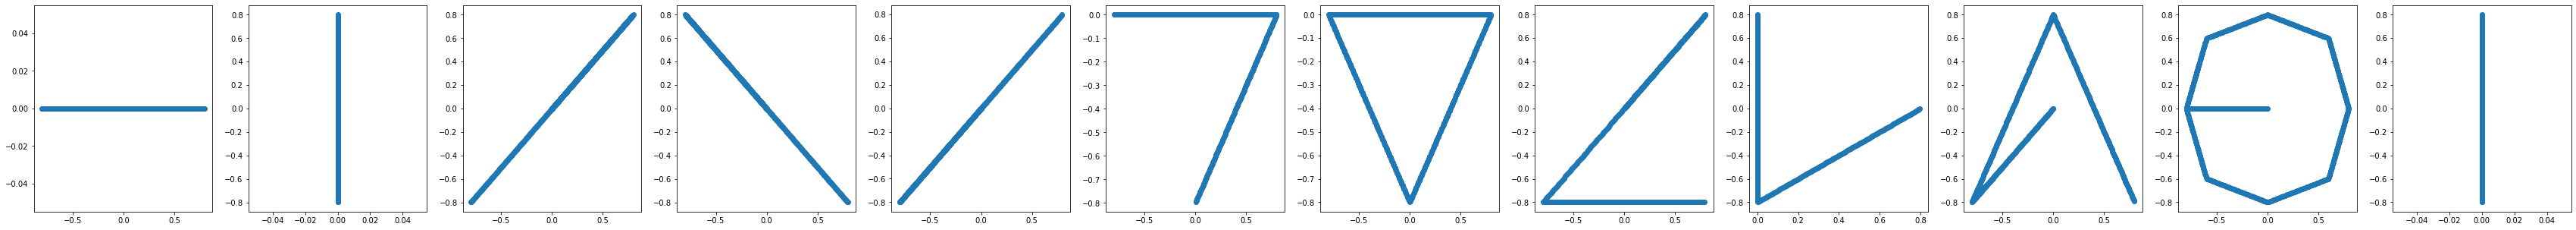

In [ ]:
# visualize

plot_images(load_katakana_ref)

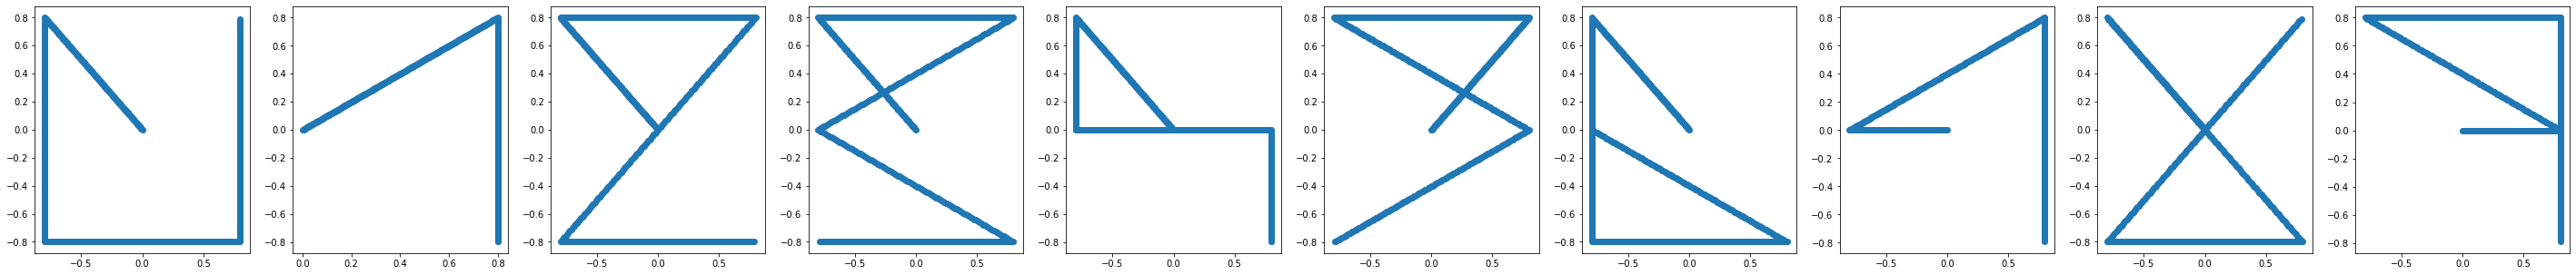

In [ ]:
plot_images(load_numbers_ref)